# Cluster Centers

- L2 - mean of the points in the cluster
$$ \mu = \frac{1}{n} \sum_{i=1}^{n} x_i $$

- L1 - median of the points in the cluster
$$ \mu = median(x_1, x_2, ..., x_n) $$
$$ median(x_1, x_2, ..., x_n) = x_{(n+1)/2} $$
$$ median(x_1, x_2, ..., x_n) = \frac{x_{n/2} + x_{n/2+1}}{2} $$

- L0 - mode of the points in the cluster
$$ \mu = mode(x_1, x_2, ..., x_n) $$
$$ mode(x_1, x_2, ..., x_n) = x_i $$
$$ mode(x_1, x_2, ..., x_n) = \text{any } x_i \text{ that appears most frequently} $$

- L-infinity - point in the cluster that is closest to all other points
$$ \mu = x_i $$
$$ x_i = \text{argmin}_{x_j} \sum_{j=1}^{n} |x_i - x_j| $$



Accuracy: 1.0
Confusion matrix:
[[11  0  0]
 [ 0 12  0]
 [ 0  0  7]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



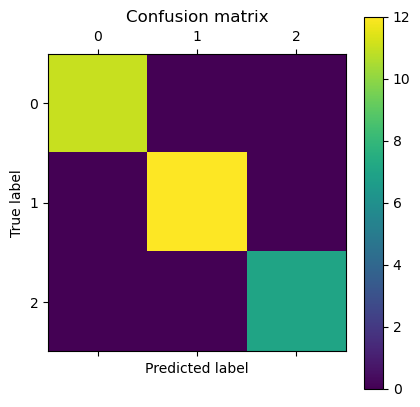

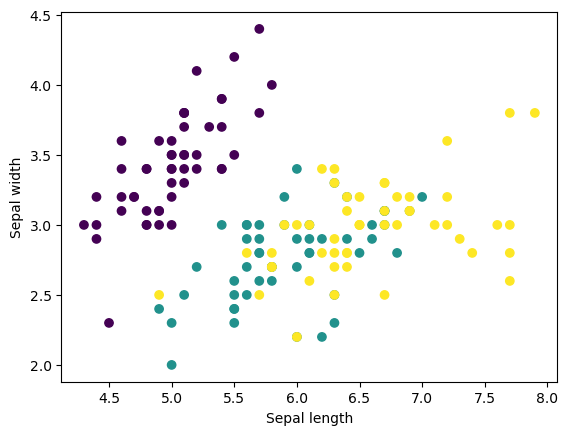

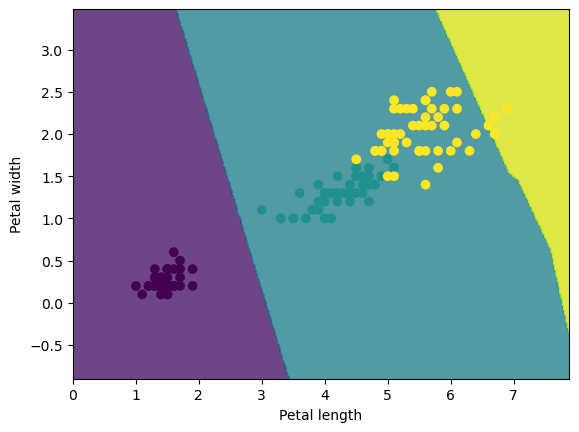

In [17]:
# KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

# Create a classification report
cr = classification_report(y_test, y_pred)
print('Classification report:')
print(cr)

# Plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


# Plot the decision boundary
h = 0.02
x_min, x_max = X[:, 2].min() - 1, X[:, 2].max() + 1
y_min, y_max = X[:, 3].min() - 1, X[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use all 4 features for prediction
Z = knn.predict(np.c_[np.zeros(xx.ravel().shape), np.zeros(yy.ravel().shape), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score

# List of possible Ks
k_values = list(range(1, 31))

# Empty list to hold cross validation scores
cv_scores = []

# Perform 10-fold cross validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
mse = [1 - x for x in cv_scores]

# Determining best k
optimal_k = k_values[mse.index(min(mse))]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 5


The optimal number of neighbors is 10


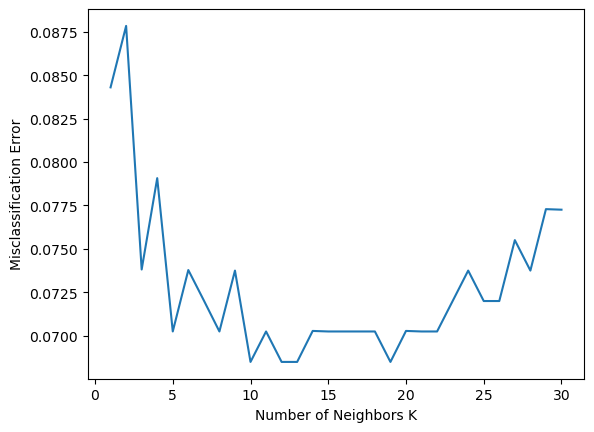

In [18]:
# KNN for breast cancer dataset
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

k_values = list(range(1, 31))
cv_scores = []

# Perform 10-fold cross validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
mse = [1 - x for x in cv_scores]

# Determining best k
optimal_k = k_values[mse.index(min(mse))]
print(f"The optimal number of neighbors is {optimal_k}")

# Plot misclassification error vs k
plt.plot(k_values, mse)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()



Accuracy: 0.9649122807017544
Confusion matrix:
[[38  2]
 [ 2 72]]
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



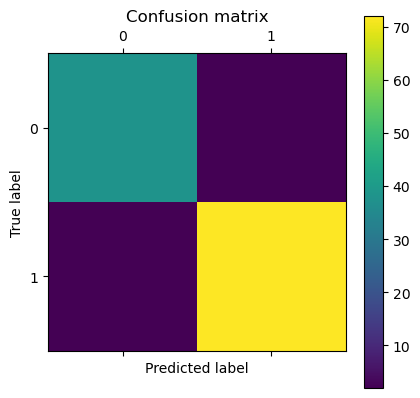

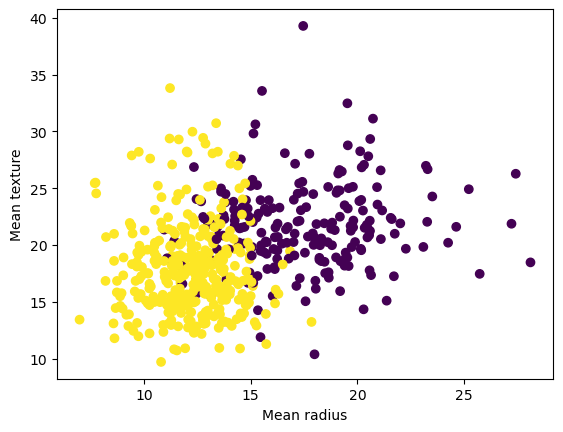

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

# Create a classification report
cr = classification_report(y_test, y_pred)
print('Classification report:')
print(cr)

# Plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.show()



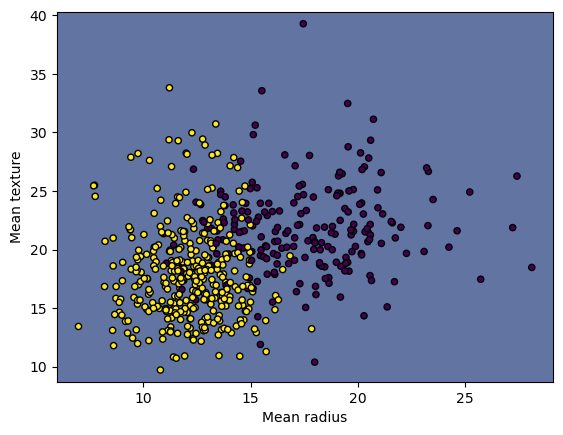

In [34]:
# Plot the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Hold the other features constant at their mean values
constant_features = np.full((xx.ravel().shape[0], X.shape[1] - 2), X[:, 2:].mean(axis=0))

# Combine the two features for the x and y axes with the constant features
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), constant_features])

# Reshape the predicted classes to be a grid
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.show()
